In [1]:
import pandas as pd

In [3]:
df=pd.read_csv(r"alzheimers_disease_patient_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [5]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
print(df.head())

print(df.describe())

print(df.isnull().sum())

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

In [7]:
# One-hot encoding for categorical features (Gender, Ethnicity)
df = pd.get_dummies(df, columns=['Gender', 'Ethnicity'], drop_first=True)

# Drop unnecessary columns
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

# Display the updated dataset
print(df.head())


   Age  EducationLevel        BMI  Smoking  AlcoholConsumption  \
0   73               2  22.927749        0           13.297218   
1   89               0  26.827681        0            4.542524   
2   73               1  17.795882        0           19.555085   
3   74               1  33.800817        1           12.209266   
4   89               0  20.716974        0           18.454356   

   PhysicalActivity  DietQuality  SleepQuality  FamilyHistoryAlzheimers  \
0          6.327112     1.347214      9.025679                        0   
1          7.619885     0.518767      7.151293                        0   
2          7.844988     1.826335      9.673574                        1   
3          8.428001     7.435604      8.392554                        0   
4          6.310461     0.795498      5.597238                        0   

   CardiovascularDisease  ...  Confusion  Disorientation  PersonalityChanges  \
0                      0  ...          0               0                

In [8]:
# Define features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [10]:
# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       277
           1       0.96      0.83      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430



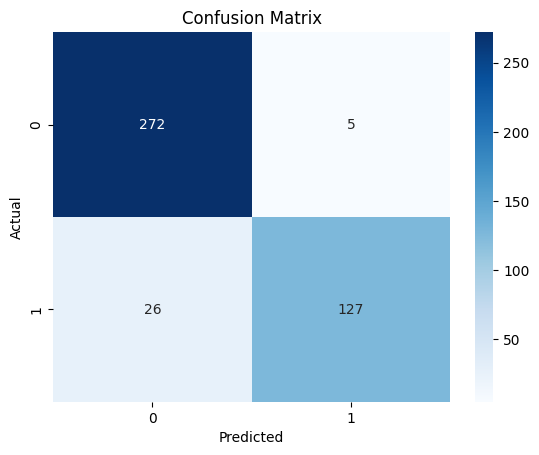

Model Accuracy: 0.9279


In [11]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


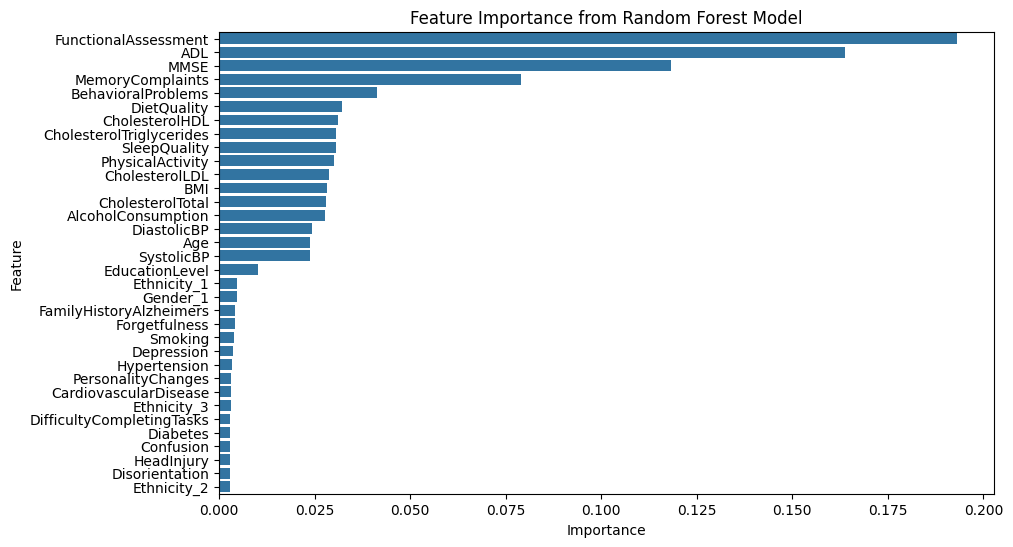

In [12]:
# Feature importance from the Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance from Random Forest Model')
plt.show()
